<a href="https://colab.research.google.com/github/helbramn/ABProgramming-RBC/blob/master/Nvidia_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cargar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el archivo CSV
file_path = "/content/NVIDIA_datos.csv"
data = pd.read_csv(file_path, encoding="latin-1")


# Revisar las primeras filas
print(data.head())

# Información general del dataset
print(data.info())

# Resumen estadístico
print(data.describe())


  Trimestre          Producto         Region Cliente Principal  \
0   Q1 2024  GPUs Data Center        America            Amazon   
1   Q1 2024       Gaming GPUs  Asia-Pacifico           Alibaba   
2   Q2 2024   GPUs Automotive         Europa               BMW   
3   Q3 2024  GPUs Data Center  Asia-Pacifico         Microsoft   
4   Q4 2024       Gaming GPUs        America          Best Buy   

  Segmento de Cliente  Ingresos (USD)  Cantidad Vendida  \
0             Empresa           12500              1000   
1           Minorista            8300              1200   
2             Empresa            2000               150   
3             Empresa           14200              1100   
4           Minorista            9100              1300   

   Precio Promedio (USD)  Gastos de Marketing (USD)  Crecimiento (%)  \
0                  12.50                       2500               25   
1                   6.92                       1800               15   
2                  13.33        

In [ ]:
data['Ingresos (USD)'] = data['Ingresos (USD)'].astype(float)
data['Cantidad Vendida'] = data['Cantidad Vendida'].astype(int)
data['Precio Promedio (USD)'] = data['Precio Promedio (USD)'].astype(float)
data['Gastos de Marketing (USD)'] = data['Gastos de Marketing (USD)'].astype(float)
data['Crecimiento (%)'] = data['Crecimiento (%)'].astype(float)

data_encoded = pd.get_dummies(data, columns=['Producto', 'Region', 'Tendencia del Mercado'], drop_first=True)

X = data_encoded.drop(['Ingresos (USD)', 'Trimestre', 'Cliente Principal'], axis=1)
Y = data_encoded['Ingresos (USD)']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Datos de prueba: {X_test.shape}")


Datos de entrenamiento: (154, 13)
Datos de prueba: (66, 13)


In [ ]:
# Convertir variables categóricas en columnas numéricas (One-Hot Encoding)
data_encoded = pd.get_dummies(data, columns=['Producto', 'Region', 'Tendencia del Mercado'], drop_first=True)

# Confirmar las nuevas columnas
print(data_encoded.head())


  Trimestre Cliente Principal Segmento de Cliente  Ingresos (USD)  \
0   Q1 2024            Amazon             Empresa         12500.0   
1   Q1 2024           Alibaba           Minorista          8300.0   
2   Q2 2024               BMW             Empresa          2000.0   
3   Q3 2024         Microsoft             Empresa         14200.0   
4   Q4 2024          Best Buy           Minorista          9100.0   

   Cantidad Vendida  Precio Promedio (USD)  Gastos de Marketing (USD)  \
0              1000                  12.50                     2500.0   
1              1200                   6.92                     1800.0   
2               150                  13.33                      400.0   
3              1100                  12.91                     3000.0   
4              1300                   7.00                     2200.0   

   Crecimiento (%)  Satisfaccion del Cliente  Producto_GPUs Data Center  \
0             25.0                         5                       True

In [ ]:
from sklearn.model_selection import train_test_split

# Separar variables independientes (X) y dependiente (Y)
X = data_encoded.drop(['Ingresos (USD)', 'Trimestre', 'Cliente Principal'], axis=1)  # Quitamos columnas irrelevantes
Y = data_encoded['Ingresos (USD)']

# Dividir en datos de entrenamiento (70%) y prueba (30%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(f"Datos de entrenamiento: {X_train.shape}")
print(f"Datos de prueba: {X_test.shape}")


Datos de entrenamiento: (154, 13)
Datos de prueba: (66, 13)


In [ ]:
# Verificar los tipos de datos de las variables independientes
print(X_train.dtypes)


Segmento de Cliente             object
Cantidad Vendida                 int64
Precio Promedio (USD)          float64
Gastos de Marketing (USD)      float64
Crecimiento (%)                float64
Satisfaccion del Cliente         int64
Producto_GPUs Data Center         bool
Producto_Gaming GPUs              bool
Region_Asia-Pacifico              bool
Region_Asia-Paci­fico             bool
Region_Europa                     bool
Tendencia del Mercado_Baja        bool
Tendencia del Mercado_Media       bool
dtype: object


In [ ]:
# Aplicar One-Hot Encoding a todas las columnas categóricas
X_encoded = pd.get_dummies(X, drop_first=True)

# Verificar que se ha hecho correctamente
print(X_encoded.head())


   Cantidad Vendida  Precio Promedio (USD)  Gastos de Marketing (USD)  \
0              1000                  12.50                     2500.0   
1              1200                   6.92                     1800.0   
2               150                  13.33                      400.0   
3              1100                  12.91                     3000.0   
4              1300                   7.00                     2200.0   

   Crecimiento (%)  Satisfaccion del Cliente  Producto_GPUs Data Center  \
0             25.0                         5                       True   
1             15.0                         4                      False   
2             10.0                         3                      False   
3             30.0                         5                       True   
4             12.0                         4                      False   

   Producto_Gaming GPUs  Region_Asia-Pacifico  Region_Asia-Paci­fico  \
0                 False               

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Dividir los datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, Y_train)

# Evaluar el modelo
Y_pred = modelo.predict(X_test)

# Mostrar los coeficientes y el rendimiento del modelo
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)
print("R²:", r2_score(Y_test, Y_pred))
print("RMSE:", mean_squared_error(Y_test, Y_pred, squared=False))


Coeficientes: [ 1.78177201e+01 -6.19387289e+01 -7.13135018e-01 -9.09076097e+01
  4.88118114e+01  1.86180995e+03 -3.67480809e+03  8.39662869e+02
 -2.53461093e+03  1.81299814e+03  1.81299814e+03 -3.67480809e+03
 -1.14019715e+03]
Intercepto: -2616.693594889597
R²: 0.9995141416503732
RMSE: 120.3405593326075


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, Y_train)

# Mostrar los coeficientes del modelo
print("Coeficientes del modelo:", modelo.coef_)
print("Intercepto:", modelo.intercept_)


Coeficientes del modelo: [ 1.78177201e+01 -6.19387289e+01 -7.13135018e-01 -9.09076097e+01
  4.88118114e+01  1.86180995e+03 -3.67480809e+03  8.39662869e+02
 -2.53461093e+03  1.81299814e+03  1.81299814e+03 -3.67480809e+03
 -1.14019715e+03]
Intercepto: -2616.693594889597


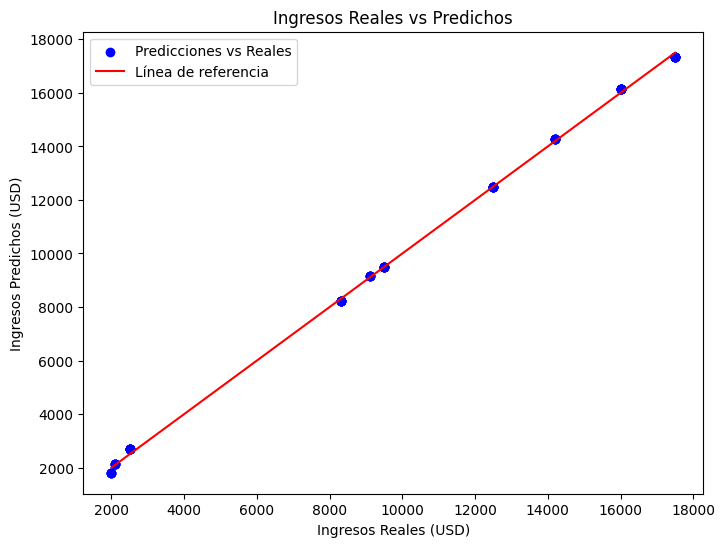

In [ ]:
import matplotlib.pyplot as plt

# Graficar los ingresos reales vs los predichos
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, color='blue', label='Predicciones vs Reales')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', label='Línea de referencia')
plt.xlabel('Ingresos Reales (USD)')
plt.ylabel('Ingresos Predichos (USD)')
plt.title('Ingresos Reales vs Predichos')
plt.legend()
plt.show()


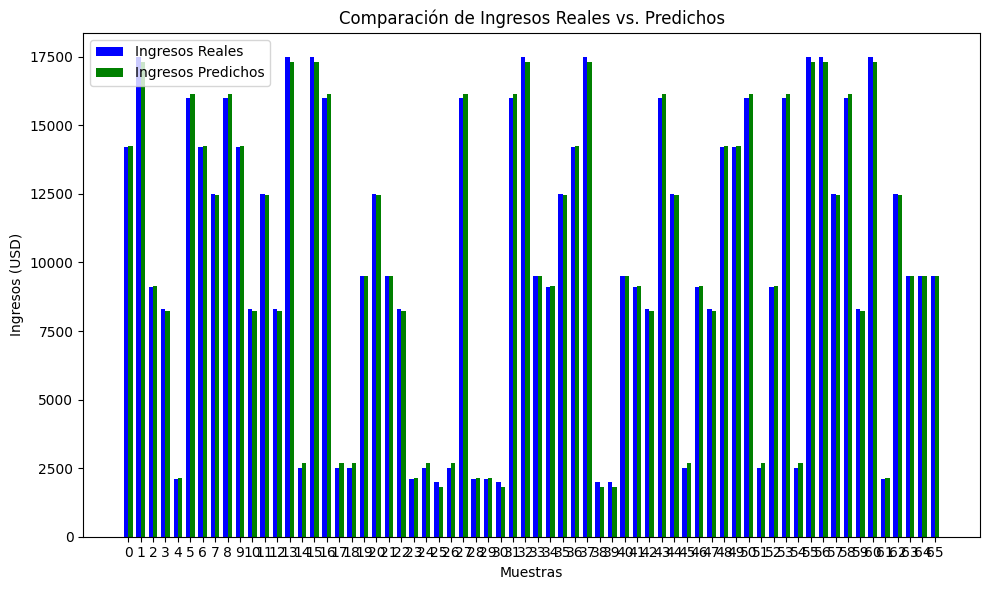

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos para el gráfico de barras
indices = np.arange(len(Y_test))  # Índices para las barras
ancho_barra = 0.35  # Ancho de cada barra

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajusta el tamaño del gráfico si es necesario
plt.bar(indices, Y_test, ancho_barra, label='Ingresos Reales', color='blue')
plt.bar(indices + ancho_barra, Y_pred, ancho_barra, label='Ingresos Predichos', color='green')

# Configurar el gráfico
plt.xlabel('Muestras')
plt.ylabel('Ingresos (USD)')
plt.title('Comparación de Ingresos Reales vs. Predichos')
plt.xticks(indices + ancho_barra / 2, indices)  # Ajusta las etiquetas del eje x
plt.legend()  # Muestra la leyenda
plt.tight_layout()  # Ajusta el espaciado del gráfico
plt.show()

In [ ]:
import pandas as pd

# Cargar el archivo CSV
file_path = "/content/NVIDIA_datos.csv"
data = pd.read_csv(file_path, encoding='latin-1')

# Limpiar los datos (eliminar filas con encabezados duplicados)
data_cleaned = data[data['Trimestre'] != 'Trimestre']

# Convertir las columnas a su tipo adecuado
data_cleaned['Ingresos (USD)'] = data_cleaned['Ingresos (USD)'].str.replace(r"[^\d.]", "", regex=True).astype(float)
data_cleaned['Cantidad Vendida'] = data_cleaned['Cantidad Vendida'].astype(int)
data_cleaned['Precio Promedio (USD)'] = data_cleaned['Precio Promedio (USD)'].astype(float)
data_cleaned['Gastos de Marketing (USD)'] = data_cleaned['Gastos de Marketing (USD)'].astype(float)
data_cleaned['Crecimiento (%)'] = data_cleaned['Crecimiento (%)'].astype(float)

# Aplicar One-Hot Encoding a las variables categóricas
data_encoded = pd.get_dummies(data_cleaned, columns=['Producto', 'Region', 'Tendencia del Mercado'], drop_first=True)

# Separar X (variables independientes) y Y (variable dependiente)
X = data_encoded.drop(['Ingresos (USD)', 'Trimestre', 'Cliente Principal'], axis=1)
Y = data_encoded['Ingresos (USD)']

# Dividir en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [ ]:
from google.colab import auth
auth.authenticate_user()


In [ ]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!git config --global user.name "helbramn"
!git config --global user.email "barabasrori@gmail.com"


In [ ]:
!git clone https://github.com/helbramn/NVIDIA_PrediccionDatos.git

Cloning into 'NVIDIA_PrediccionDatos'...


In [ ]:
!mv /content/NVIDIA_datos.csv /content/NVIDIA_PrediccionDatos/

In [ ]:
%cd /content/NVIDIA_PrediccionDatos/

/content/NVIDIA_PrediccionDatos


In [ ]:
# Agregar los archivos
!git add .

# Hacer commit con un mensaje
!git commit -m "Subiendo trabajo final de predicción de ingresos de NVIDIA"

# Subir los archivos al repositorio
!git push origin master

[main (root-commit) 57e4583] Subiendo trabajo final de predicción de ingresos de NVIDIA
 1 file changed, 221 insertions(+)
 create mode 100644 NVIDIA_datos.csv
error: src refspec master does not match any
error: failed to push some refs to 'https://github.com/helbramn/NVIDIA_PrediccionDatos.git'
